In [1]:
import os
import numpy as np

import torch

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette("Dark2", n_colors=8)

from source.constants import RESULTS_PATH, PLOTS_PATH
from source.utils.uncertainty_measures import calculate_uncertainties

os.makedirs(PLOTS_PATH, exist_ok=True)

/system/apps/userenv/kschweig/quam/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
seed = 42

methods = ["DE", "LA", "MCD"]
dataset_names = ["cifar10", "cifar100", "svhn", "tin"]
n_classes = [10, 100, 10, 200]
models = ["resnet18", "densenet169", "regnet"]
model_names = ["ResNet-18", "DenseNet-169", "RegNet-Y"]

configurations = {
    methods[0]: [models[0]],#models[::-1][1:],
    methods[1]: [models[0]],
    methods[2]: [models[0]]
}

p_drop = 0.2                                # dropout rate of MC dropout     
runs = 5                                    # number of runs

In [3]:
def get_uncertainties(configurations):

    uncertainties = dict()

    for method, models_ in configurations.items():
        for model in models_:
            uncertainties[method + model] = dict()
            for dataset_name, n_class in zip(dataset_names, n_classes):
                uncertainties[method + model][dataset_name] = list()
                if method == "DE":
                    path = os.path.join(RESULTS_PATH, f"{dataset_name}_{model}_seed{seed}")
                elif method == "LA":
                    path = os.path.join(RESULTS_PATH, f"{dataset_name}_{model}_seed{seed}_laplace")
                elif method == "MCD":
                    path = os.path.join(RESULTS_PATH, f"{dataset_name}_{model}_dropout{p_drop}_seed{seed}")

                probits = torch.load(os.path.join(path, f"{dataset_name}_probits.pt")).to(torch.float32)
                probits = probits.reshape(len(probits), -1, n_class)
                print(method, model, probits.shape)
                
                uncertainties[method + model][dataset_name] = calculate_uncertainties(probits, probits)

    return uncertainties

uncertainties = get_uncertainties(configurations)

DE resnet18 torch.Size([10000, 50, 10])
DE resnet18 torch.Size([10000, 50, 100])
DE resnet18 torch.Size([26032, 50, 10])
DE resnet18 torch.Size([10000, 50, 200])
LA resnet18 torch.Size([10000, 50, 10])
LA resnet18 torch.Size([10000, 50, 100])
LA resnet18 torch.Size([26032, 50, 10])
LA resnet18 torch.Size([10000, 50, 200])
MCD resnet18 torch.Size([10000, 50, 10])
MCD resnet18 torch.Size([10000, 50, 100])
MCD resnet18 torch.Size([26032, 50, 10])
MCD resnet18 torch.Size([10000, 50, 200])


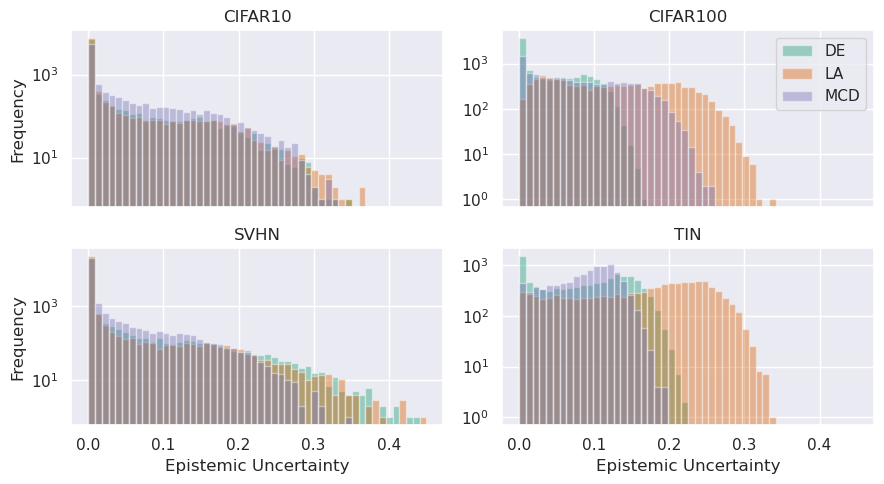

In [4]:
# four subplots for each dataset
fig, axs = plt.subplots(2, 2, figsize=(9, 5), sharex=True)
axs = axs.flatten()

for i, dataset_name in enumerate(dataset_names):
    ax = axs[i]
    j = 0
    for method, models_ in configurations.items():
        for model in models_:
            uncerts = uncertainties[method + model][dataset_name]["C2"][2] / np.log(n_classes[i]) # normalize by log(n_classes)
            ax.hist(uncerts, bins=np.linspace(0, 0.45, 51), alpha=0.4, label=f"{method}", rasterized=True)
            j += 1
    ax.set_title(dataset_name.upper())
    ax.set_yscale("log")

    if i % 2 == 0: ax.set_ylabel("Frequency")
    if i // 2 == 1: ax.set_xlabel("Epistemic Uncertainty")

axs[1].legend()

fig.tight_layout()
plt.savefig(os.path.join(PLOTS_PATH, "EU_comparison.pdf"))
plt.show()

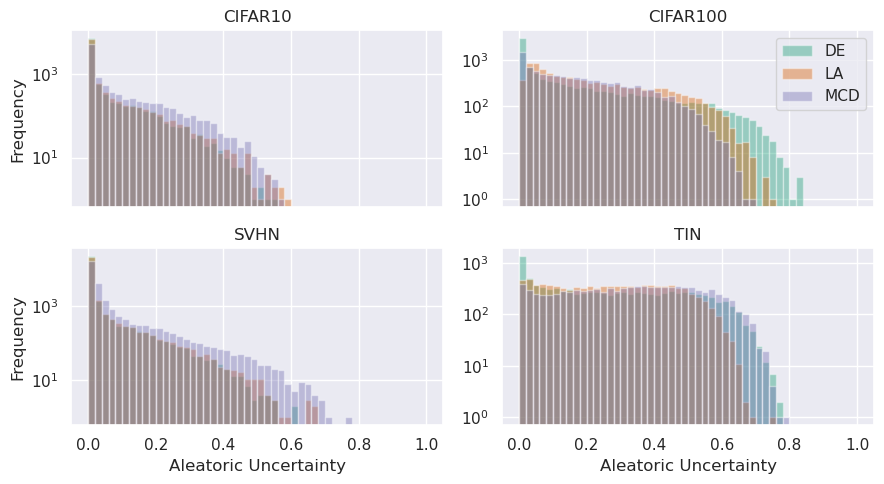

In [5]:
# four subplots for each dataset
fig, axs = plt.subplots(2, 2, figsize=(9, 5), sharex=True)
axs = axs.flatten()

for i, dataset_name in enumerate(dataset_names):
    ax = axs[i]
    j = 0
    for method, models_ in configurations.items():
        for model in models_:
            uncerts = uncertainties[method + model][dataset_name]["C2"][1] / np.log(n_classes[i]) # normalize by log(n_classes)
            ax.hist(uncerts, bins=np.linspace(0, 1, 51), alpha=0.4, label=f"{method}", rasterized=True)
            j += 1
    ax.set_title(dataset_name.upper())
    ax.set_yscale("log")

    if i % 2 == 0: ax.set_ylabel("Frequency")
    if i // 2 == 1: ax.set_xlabel("Aleatoric Uncertainty")

axs[1].legend()

fig.tight_layout()
plt.savefig(os.path.join(PLOTS_PATH, "AU_comparison.pdf"))
plt.show()

In [6]:
configurations = {
    methods[0]: models
}

method = "DE"

uncertainties = get_uncertainties(configurations)

DE resnet18 torch.Size([10000, 50, 10])
DE resnet18 torch.Size([10000, 50, 100])
DE resnet18 torch.Size([26032, 50, 10])
DE resnet18 torch.Size([10000, 50, 200])
DE densenet169 torch.Size([10000, 50, 10])
DE densenet169 torch.Size([10000, 50, 100])
DE densenet169 torch.Size([26032, 50, 10])
DE densenet169 torch.Size([10000, 50, 200])
DE regnet torch.Size([10000, 50, 10])
DE regnet torch.Size([10000, 50, 100])
DE regnet torch.Size([26032, 50, 10])
DE regnet torch.Size([10000, 50, 200])


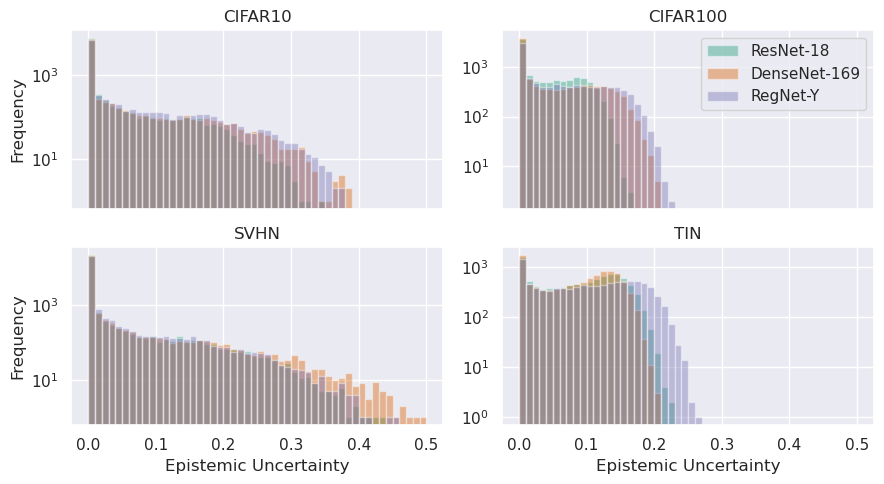

In [7]:
# four subplots for each dataset
fig, axs = plt.subplots(2, 2, figsize=(9, 5), sharex=True)
axs = axs.flatten()

for i, dataset_name in enumerate(dataset_names):
    ax = axs[i]
    j = 0
    for method, models_ in configurations.items():
        for m, model in enumerate(models_):
            uncerts = uncertainties[method + model][dataset_name]["C2"][2] / np.log(n_classes[i]) # normalize by log(n_classes)
            ax.hist(uncerts, bins=np.linspace(0, 0.5, 51), alpha=0.4, label=f"{model_names[m]}", rasterized=True)
            j += 1
    ax.set_title(dataset_name.upper())
    ax.set_yscale("log")

    if i % 2 == 0: ax.set_ylabel("Frequency")
    if i // 2 == 1: ax.set_xlabel("Epistemic Uncertainty")

axs[1].legend()

fig.tight_layout()
plt.savefig(os.path.join(PLOTS_PATH, "EU_comparison_network.pdf"))
plt.show()

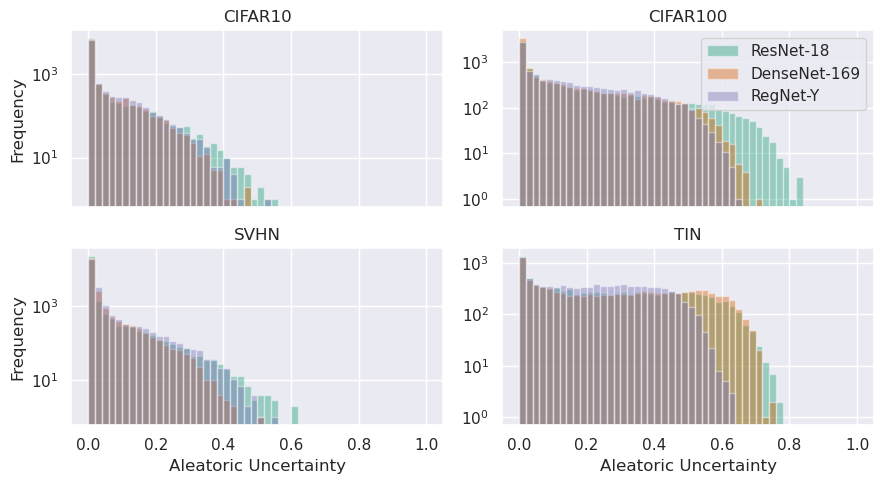

In [8]:
# four subplots for each dataset
fig, axs = plt.subplots(2, 2, figsize=(9, 5), sharex=True)
axs = axs.flatten()

for i, dataset_name in enumerate(dataset_names):
    ax = axs[i]
    j = 0
    for method, models_ in configurations.items():
        for m, model in enumerate(models_):
            uncerts = uncertainties[method + model][dataset_name]["C2"][1] / np.log(n_classes[i]) # normalize by log(n_classes)
            ax.hist(uncerts, bins=np.linspace(0, 1, 51), alpha=0.4, label=f"{model_names[m]}", rasterized=True)
            j += 1
    ax.set_title(dataset_name.upper())
    ax.set_yscale("log")

    if i % 2 == 0: ax.set_ylabel("Frequency")
    if i // 2 == 1: ax.set_xlabel("Aleatoric Uncertainty")

axs[1].legend()

fig.tight_layout()
plt.savefig(os.path.join(PLOTS_PATH, "AU_comparison_network.pdf"))
plt.show()